# Feature Engineering

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler
from imblearn.over_sampling  import SMOTENC
from imblearn.under_sampling import NearMiss

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

### Load Data from Fish & Wildlife Service, Forest Service and Environmental Protection Agency

In [2]:
# Load datasets
species = pd.read_pickle("../Data/FWS.pkl")
forests = pd.read_pickle("../Data/FS.pkl")
aqi     = pd.read_pickle("../Data/EPA.pkl")

# Merge datasets
species = species.merge(forests, on='State')
species = species.merge(aqi, left_on='State', right_index=True, how='left')

# Drop columns
species = species.drop(['Scientific Name', 'Common Name', 'Region', 'State', 'VIP'], axis = 1)
species.head()

,Group,Federal Listing Status,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days
0,Birds,Not Listed,32413,22877,324,251
1,Fishes,Not Listed,32413,22877,324,251
2,Fishes,Threatened,32413,22877,324,251
3,Insects,Not Listed,32413,22877,324,251
4,Flowering Plants,Not Listed,32413,22877,324,251


### Feature Interactions

In [3]:
# Percentage of forest covereage
species['Total Land Acreage'] = species['Total Land Area (Thousands of Acres)']
species['Total Land Acreage'] = species['Total Land Acreage'].astype(float)

species['State Forest Coverage'] = species['Forest Land Area (Thousands of Acres)'] / species['Total Land Acreage']

# Drop columns
species = species.drop(['Total Land Area (Thousands of Acres)', 'Forest Land Area (Thousands of Acres)'], axis = 1)

In [4]:
# Ratio of good AQI days to total AQI days recorded in 2018
species['Good AQI Days per Year'] = species['Good Days'] / species['Days with AQI']

# Drop columns
species = species.drop(['Days with AQI', 'Good Days'], axis = 1)
species.head()

,Group,Federal Listing Status,Total Land Acreage,State Forest Coverage,Good AQI Days per Year
0,Birds,Not Listed,32413.0,0.705797,0.774691
1,Fishes,Not Listed,32413.0,0.705797,0.774691
2,Fishes,Threatened,32413.0,0.705797,0.774691
3,Insects,Not Listed,32413.0,0.705797,0.774691
4,Flowering Plants,Not Listed,32413.0,0.705797,0.774691


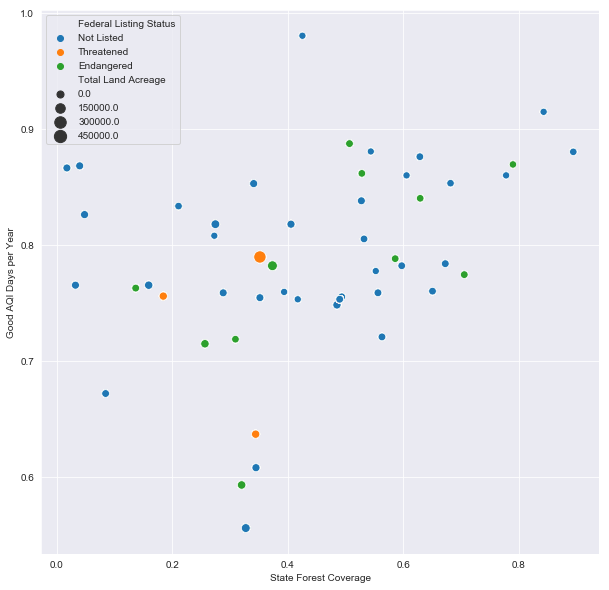

In [5]:
fig, aa = plt.subplots(figsize=(10,10))

sns.scatterplot(x     = 'State Forest Coverage',
                y     = 'Good AQI Days per Year',
                hue   = 'Federal Listing Status',
                size  = 'Total Land Acreage',
                sizes = (50,150),
                data  = species)

### Create Dummy Variables for Categorical Data

In [6]:
#create dummy variables
species = pd.get_dummies(data=species, columns=['Group'])
print(species.shape)
species.head()

(11347, 24)


,Federal Listing Status,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
0,Not Listed,32413.0,0.705797,0.774691,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Threatened,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Set Target and Feature Variables

In [7]:
# Create target variables
y        = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create feature variables
X = species.drop(['Federal Listing Status'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
0,32413.0,0.705797,0.774691,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Create Training and Test Sets

In [8]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_stats = pd.DataFrame({'Train':        y_train.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train.value_counts() / y_train.count(),
                           'Test Normal':  y_test.value_counts()  / y_test.count()})

data_stats.loc['Total'] = data_stats.sum().astype(int)
data_stats

,Train,Test,Train Normal,Test Normal
Not Listed,6942,1733,0.764790,0.763436
Endangered,1511,373,0.166465,0.164317
Threatened,624,164,0.068745,0.072247
Total,9077,2270,1.000000,0.000000


### Feature Scaling

In [9]:
non_categorical_cols = ['Total Land Acreage', 'State Forest Coverage', 'Good AQI Days per Year']
categorical_cols     = ['Group_Amphibians',               'Group_Annelid Worms',
                        'Group_Arachnids',                'Group_Birds',
                        'Group_Clams',                    'Group_Conifers and Cycads',
                        'Group_Corals',                   'Group_Crustaceans',
                        'Group_Ferns and Allies',         'Group_Fishes',
                        'Group_Flatworms and Roundworms', 'Group_Flowering Plants',
                        'Group_Hydroids',                 'Group_Insects',
                        'Group_Lichens',                  'Group_Mammals',
                        'Group_Millipedes',               'Group_Reptiles',
                        'Group_Snails',                   'Group_Sponges']

In [10]:
X_train.head()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
1055,33303.0,0.563162,0.720994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,77631.0,0.319975,0.593315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5289,4110.0,0.425304,0.980663,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1309,99699.0,0.327165,0.556164,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1793,99699.0,0.327165,0.556164,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
scaler                        = MinMaxScaler()
X_train[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test[non_categorical_cols]  = scaler.transform(    X_test[non_categorical_cols])

X_train.head()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
1055,0.089439,0.622193,0.388294,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0.210901,0.345045,0.087516,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5289,0.009448,0.465083,1.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1309,0.271368,0.353239,0.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1793,0.271368,0.353239,0.000000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Class Balancing

In [12]:
# balance classes with SMOTENC oversampling
smote                        = SMOTENC(categorical_features=list(range(3,len(X_train.columns))))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote                = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote                = pd.Series(y_train_smote)

# balanced data set statistics
smote_stats = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                            'Test':         y_test.value_counts(),
                            'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                            'Test Normal':  y_test.value_counts()        / y_test.count()})

smote_stats.loc['Total'] = smote_stats.sum().astype(int)
smote_stats

,Train,Test,Train Normal,Test Normal
Not Listed,6942,1733,0.333333,0.763436
Endangered,6942,373,0.333333,0.164317
Threatened,6942,164,0.333333,0.072247
Total,20826,2270,1.000000,0.000000


In [13]:
# check categorical features of class-balanced model
X_train_smote.describe()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
count,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,...,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000
mean,0.132844,0.490147,0.520269,0.008547,0.000192,0.003505,0.079132,0.085566,0.000864,0.000096,...,0.000336,0.467204,0.000048,0.075867,0.001392,0.072554,0.000048,0.046864,0.024681,0.000192
std,0.125104,0.186445,0.297291,0.092056,0.013858,0.059103,0.269951,0.279729,0.029387,0.009799,...,0.018331,0.498935,0.006929,0.264791,0.037291,0.259408,0.006929,0.211354,0.155154,0.013858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067439,0.353239,0.388294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092573,0.465083,0.532837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.179938,0.617535,0.720397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# balance classes with NearMiss undersampling
under                        = NearMiss(sampling_strategy='not minority')
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
X_train_under                = pd.DataFrame(X_train_under, columns=X_train.columns)
y_train_under                = pd.Series(y_train_under)

# balanced data set statistics
under_stats = pd.DataFrame({'Train':        y_train_under.value_counts(),
                            'Test':         y_test.value_counts(),
                            'Train Normal': y_train_under.value_counts() / y_train_under.count(),
                            'Test Normal':  y_test.value_counts()        / y_test.count()})

under_stats.loc['Total'] = under_stats.sum().astype(int)
under_stats

,Train,Test,Train Normal,Test Normal
Endangered,624,373,0.333333,0.164317
Not Listed,624,1733,0.333333,0.763436
Threatened,624,164,0.333333,0.072247
Total,1872,2270,1.000000,0.000000


In [15]:
# check categorical features of class-balanced model
X_train_under.describe()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,Group_Flatworms and Roundworms,Group_Flowering Plants,Group_Hydroids,Group_Insects,Group_Lichens,Group_Mammals,Group_Millipedes,Group_Reptiles,Group_Snails,Group_Sponges
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.0,1872.0,1872.000000,1872.000000,1872.000000,1872.000000,...,1872.0,1872.000000,1872.0,1872.000000,1872.0,1872.000000,1872.0,1872.000000,1872.000000,1872.0
mean,0.138375,0.484062,0.505583,0.010150,0.0,0.0,0.061966,0.053419,0.001068,0.001068,...,0.0,0.649573,0.0,0.027778,0.0,0.051282,0.0,0.053419,0.010150,0.0
std,0.118609,0.168624,0.337711,0.100259,0.0,0.0,0.241158,0.224927,0.032677,0.032677,...,0.0,0.477231,0.0,0.164379,0.0,0.220631,0.0,0.224927,0.100259,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,0.067439,0.353239,0.122627,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,0.094353,0.465083,0.532837,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,0.210901,0.582469,0.738575,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0


### Scaled and Balanced Datasets

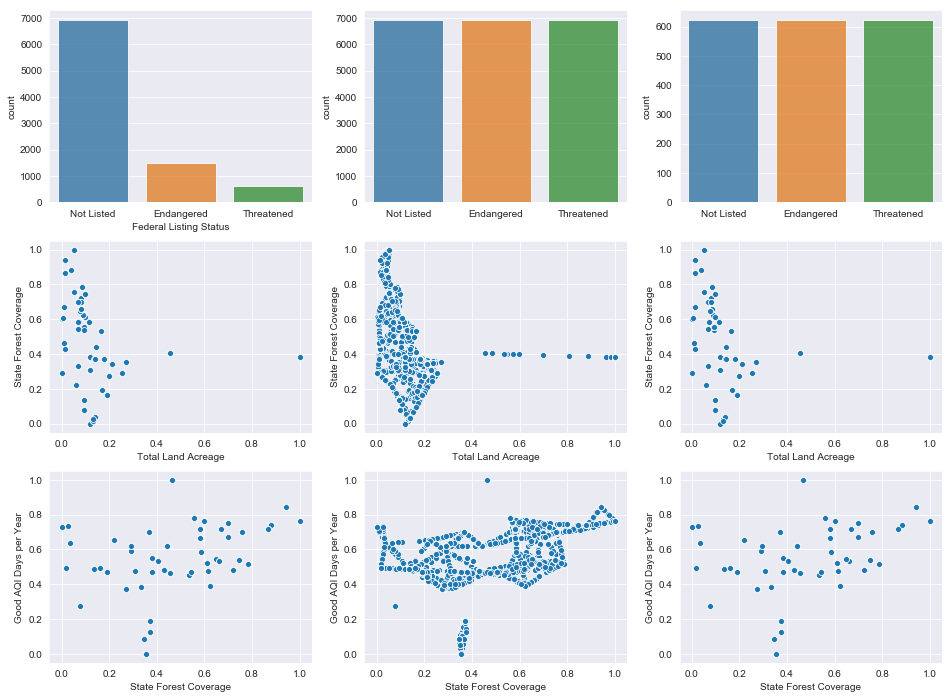

In [16]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(3, 3, figsize=(16,12))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])
sns.countplot(y_train_under, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,2])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])
sns.scatterplot(x=X_train_under.columns[0], y=X_train_under.columns[1], data=X_train_under, ax = axes[1,2])

sns.scatterplot(x=X_train.columns[1],       y=X_train.columns[2],       data=X_train,       ax = axes[2,0])
sns.scatterplot(x=X_train_smote.columns[1], y=X_train_smote.columns[2], data=X_train_smote, ax = axes[2,1])
sns.scatterplot(x=X_train_under.columns[1], y=X_train_under.columns[2], data=X_train_under, ax = axes[2,2])

### Data Loading

In [17]:
X_train.to_pickle("../Data/X_train.pkl")
X_test.to_pickle( "../Data/X_test.pkl")
y_train.to_pickle("../Data/y_train.pkl")
y_test.to_pickle( "../Data/y_test.pkl")

X_train_smote.to_pickle("../Data/X_train_smote.pkl")
y_train_smote.to_pickle("../Data/y_train_smote.pkl")

X_train_under.to_pickle("../Data/X_train_under.pkl")
y_train_under.to_pickle("../Data/y_train_under.pkl")

pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')